<a href="https://colab.research.google.com/github/saikumar-dumpoju/Saikumar_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
# Write your code here
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def count_ngrams(tokens, n):
    n_grams = get_ngrams(tokens, n)
    return Counter(n_grams)

def calculate_bigram_probabilities(tokens):
    bigrams = get_ngrams(tokens, 2)
    unigrams = tokens
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(unigrams)

    probabilities = {}

    for bigram in bigram_counts:
        w1, w2 = bigram
        probability = bigram_counts[bigram] / unigram_counts[w1]
        probabilities[bigram] = probability

    return probabilities

def extract_noun_phrases(text):
    # You can use a more sophisticated approach for noun phrase extraction
    # For simplicity, we'll use a basic method here.
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)

    # Extracting noun phrases using a simple rule
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tagged_tokens)

    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))

    return noun_phrases

def calculate_relative_probabilities(dataset):
    all_noun_phrases = []
    review_noun_phrases = []

    for review in dataset:
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrases.append(Counter(noun_phrases))
        all_noun_phrases.extend(noun_phrases)

    max_freq = Counter(all_noun_phrases)

    relative_probabilities = []
    for review_noun_phrase_count in review_noun_phrases:
        relative_probabilities.append({
            np: review_noun_phrase_count[np] / max_freq[np] if max_freq[np] != 0 else 0
            for np in review_noun_phrase_count
        })

    return relative_probabilities

# Upload the dataset.txt file to your Colab environment

# Read the dataset from a file
with open('data.csv', 'r', encoding='utf-8') as file:
    dataset = file.readlines()

# Tokenize the dataset
tokenized_dataset = [word_tokenize(review) for review in dataset]

# Count the frequency of all the N-grams (N=3)
trigram_counts = count_ngrams([tuple(review) for review in tokenized_dataset], 3)
print("Trigram Frequencies:")
print(trigram_counts)

# Calculate the probabilities for all the bigrams
bigram_probabilities = calculate_bigram_probabilities([word for review in tokenized_dataset for word in review])
print("\nBigram Probabilities:")
print(bigram_probabilities)

# Extract all the noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset)
df = pd.DataFrame(relative_probabilities)
df = df.fillna(0)  # Fill NaN values with 0 for better presentation
print("\nRelative Probabilities of Noun Phrases:")
print(df)






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Trigram Frequencies:
Counter({(('``', 'This', 'phone', 'was', 'a', 'last', 'resort', '.', 'I', 'had', 'a', 'completely', 'failed', 'experience', 'with', 'another', 'seller', '’', 's', 'IPhone', '11', ',', 'and', 'to', 'be', 'honest', ',', 'I', 'was', 'extremely', 'nervous', 'when', 'ordering', 'this', 'one', '.', 'The', 'reviews', 'had', 'been', '50/50', ',', 'so', 'I', 'had', 'very', 'little', 'clue', 'what', 'I', 'was', 'going', 'to', 'get.The', 'package', 'arrived', 'a', 'day', 'early', ',', 'which', 'was', 'nice', 'and', 'unexpected', '.', 'My', 'phone', 'was', 'put', 'into', 'what', 'seemed', 'like', 'a', 'generic', 'Android', 'phone', 'box', ',', 'which', ',', 'I', '’', 'll', 'let', 'you', 'know', 'damn', 'near', 'gave', 'me', 'a', 'heart', 'attack', 'when', 'I', 'opened.Inside', 'were', 'a', 'few', 'things', '.', 'An', 'Amazon', 'renewed', 'card', 'and', 'one', 'other', 'thing', 'I', 'can', '’', 't', 'remember-', 'as', 'well', 'as', 'the', 'phone', '(', 'obviously', ')', 'and', 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
   "The future depends on what you do today.",

"The future belongs to those who learn more skills and combine them in creative ways.",

"Your time is limited, don't waste it living someone else's life.",

"The only way to do great work is to love what you do.",

"The best way to predict the future is to create it."
]

# Sample query
query = "The best way to predict the future is to create it.."

# Combine documents and query for TF-IDF matrix calculation
all_texts = documents + [query]

#Build TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

#Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

#Rank documents based on cosine similarity
document_scores = list(enumerate(cosine_similarities[0]))
sorted_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)

#Print the TF-IDF matrix
print("Terms\t", "\t".join(["Document " + str(i + 1) for i in range(len(documents))] + ["Query"]))
terms = vectorizer.get_feature_names_out()
for i in range(len(terms)):
    print(terms[i], end="\t")
    for j in range(len(all_texts)):
        print(f"{tfidf_matrix[j, i]:.4f}", end="\t")
    print()

#Print the ranked documents
print("\nQuery:", query)
print("\nRanked Documents:")
for index, score in sorted_documents:
    print(f"Document {index + 1}: Similarity Score = {score:.4f}")
    print(f"   {documents[index]}")
    print()











Terms	 Document 1	Document 2	Document 3	Document 4	Document 5	Query
and	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
belongs	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
best	0.0000	0.0000	0.0000	0.0000	0.3310	0.3310	
combine	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
create	0.0000	0.0000	0.0000	0.0000	0.3310	0.3310	
creative	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
depends	0.4214	0.0000	0.0000	0.0000	0.0000	0.0000	
do	0.3455	0.0000	0.0000	0.5053	0.0000	0.0000	
don	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
else	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
future	0.2500	0.1648	0.0000	0.0000	0.2395	0.2395	
great	0.0000	0.0000	0.0000	0.3081	0.0000	0.0000	
in	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
is	0.0000	0.0000	0.1892	0.1828	0.2395	0.2395	
it	0.0000	0.0000	0.2208	0.0000	0.2795	0.2795	
learn	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
life	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
limited	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
living	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
love	0

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

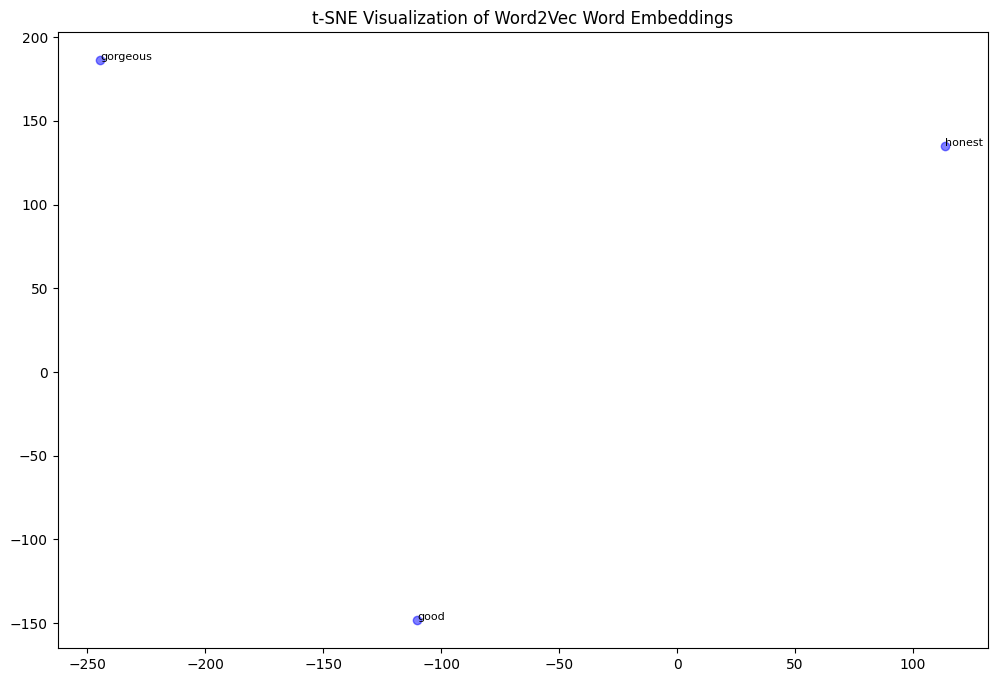

In [ ]:
# Write your code here

import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your Amazon reviews dataset
csv_path = "data.csv"
df = pd.read_csv(csv_path)

# Assuming the column name is 'Cleaned Review' (replace with the actual column name)
corpus = [str(review).split() for review in df['reviews']]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec_model.bin")

# Visualize word embeddings using t-SNE with a safe perplexity value
def visualize_embeddings(model, words):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])

    # Ensure perplexity is less than the number of samples
    perplexity = min(5, len(vectors)-1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectors_tsne = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='o', color='b', alpha=0.5)

    for i, word in enumerate(words):
        if i < len(vectors_tsne):  # Ensure we don't go out of bounds
            plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

    plt.title("t-SNE Visualization of Word2Vec Word Embeddings")
    plt.show()

# Choose words to visualize
words_to_visualize = ["good", "gorgeous", "honest", "product", "phone"]

# Visualize embeddings
visualize_embeddings(model, words_to_visualize)





# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/saikumar-dumpoju/Saikumar_INFO5731_Fall2023/blob/main/Sentiment_Analysis_Assignment-5.csv



